<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/V2_Deep_Learning_intro_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning - Part 1

In [89]:
!git clone https://github.com/naomifridman/Introduction_to_deep_learning.git

Cloning into 'Introduction_to_deep_learning'...
remote: Enumerating objects: 533, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (44/44), done.
^C


In [88]:
!rm -r Introduction_to_deep_learning

In [63]:
!ls Introduction_to_deep_learning  

data
Deep_Learning_intro_part1_linear_perceptron.ipynb
Deep_Learning_intro_part2_nonlinear_perceptron.ipynb
Deep_Learning_intro_part3_mlp_backpropogation.ipynb
Deep_Learning_intro_part4_keras_example.ipynb
Deep_Learning_intro_part4_keras_exrsice_and_solution.ipynb
Deep_Learning_intro_part5_convolutional_networks.ipynb
Deep_Learning_keras_boston_regression_and_training_tools.ipynb
Deep_Learning_keras_classification_example_and_training_tools.ipynb
Deep_Learning_keras_lstm_example.ipynb
Deep_Learning_keras_part4_train_callbacks.ipynb
DL_CNN_Lecture
imgs
lstm_example.ipynb
README.md
utils_plot.py
V2_Deep_Learning_intro_part1.ipynb


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import Introduction_to_deep_learning.utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
%matplotlib inline  

## Perceptron
Perceptron is a basic artificial neural network.<br>
It contains:
* a single layer with 
* linear activation function
Perceptronis a linear classifier.<br>
![title](Introduction_to_deep_learning/imgs/perceptron_paradigma3.png)

## Decision Units - Activation functions
There are manyoptions for decision units, and we will see them later. Lets start with the basic one, defined by McCulloch-Pitts (1943)
### Binary threshold unit
* Compute weighted sum plus bias of the input features: 
$$z=b+\sum_{i} x_{i}w_{i}$$
* Then output 1 if weighted sum larger then zero.
$$y = \begin{cases} 1 & z \geqslant  0 \\
                       0 & otherwise \\
                     \end{cases}$$


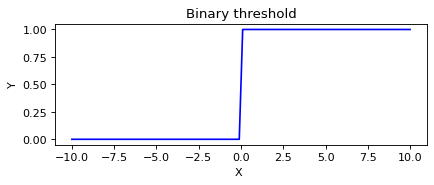

In [65]:
uplot.drow_binary_threshold()

## Learning the Bias
Now we need to learn the weights and the bias. But we can use a trick, toavoid separate scheme, for learning the bias. 
* We can add 1 to all input vectors: <br>
For X = $(X_{0}, X_{1}, ...Xn)$ Lets define:  $\bar{X}$ = $(X_{0}, X_{1}, ...Xn)$<br>
=> $$z=b+\sum_{i} x_{i}w_{i} = \sum_{i} \bar{x}_{i}\bar{w}_{i}$$
> This way, we can learn the bias as it was part of the weights. 

## Learning weights
The idea is to go over the samples, and correct/update the weights according to the results on the samples.
![title](dl3.jpg)
#### Update the weights:
* Go over all training casesin anyorder, and:
    * If the output is correct, continue
    * If output is 1 and lable is 0 ("increas W"): $\bar{W} = \bar{W} + \bar{X}_{i}$
    * If output is 0 and lable is 1 ("decreas W"): $\bar{W} = \bar{W} - \bar{X}_{i}$

### Precpetron example - Logic OR

In [66]:
def perceptron_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.
    
    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 5
    errors = []

    for t in range(n):
        
        print('epoch: ' , t)
        total_error = 0
        
        for i, x in enumerate(X):
            
            
            if (np.dot(X[i], w) == Y[i]):
                print(i, 'w*x==0', 'x',X[i],'w', w,'dot', np.dot(X[i], w), 'y',Y[i])
                print('correct')
                continue
                
            elif (np.dot(X[i], w) == 0 and Y[i] == 1):
                total_error += 1
                print(i, 'w*x==0 & y==1', 'X',X[i],'w', w,'dot',
                      np.dot(X[i], w), 'y',Y[i])
        
                
                w = w + X[i]
                print('W updated to: ', w)
                
            elif (np.dot(X[i], w) == 1 and Y[i] == 0):
                total_error += 1
                print(i, 'w*x==1 & y==0' ,'X',X[i],'w', w,'dot', 
                      np.dot(X[i], w), 'y',Y[i], )
                
                w = w - X[i]
                print('W updated to: ', w)
                
        errors.append(total_error)
        
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    
    return w

epoch:  0
0 w*x==0 x [1 0 0] w [0. 0. 0.] dot 0.0 y 0
correct
1 w*x==0 & y==1 X [1 1 0] w [0. 0. 0.] dot 0.0 y 1
W updated to:  [1. 1. 0.]
2 w*x==0 x [1 0 1] w [1. 1. 0.] dot 1.0 y 1
correct
epoch:  1
0 w*x==1 & y==0 X [1 0 0] w [1. 1. 0.] dot 1.0 y 0
W updated to:  [0. 1. 0.]
1 w*x==0 x [1 1 0] w [0. 1. 0.] dot 1.0 y 1
correct
2 w*x==0 & y==1 X [1 0 1] w [0. 1. 0.] dot 0.0 y 1
W updated to:  [1. 1. 1.]
epoch:  2
0 w*x==1 & y==0 X [1 0 0] w [1. 1. 1.] dot 1.0 y 0
W updated to:  [0. 1. 1.]
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
epoch:  3
0 w*x==0 x [1 0 0] w [0. 1. 1.] dot 0.0 y 0
correct
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
epoch:  4
0 w*x==0 x [1 0 0] w [0. 1. 1.] dot 0.0 y 0
correct
1 w*x==0 x [1 1 0] w [0. 1. 1.] dot 1.0 y 1
correct
2 w*x==0 x [1 0 1] w [0. 1. 1.] dot 1.0 y 1
correct
Leared Weights: [0. 1. 1.]


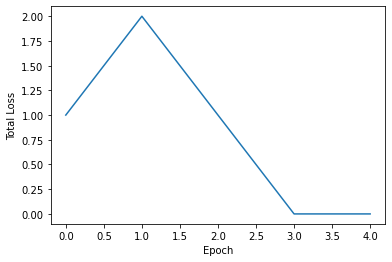

In [67]:
X = [[1,0,0],
    [1,1,0],
    [1,0,1],
    [1,1,1]]
y = [0, 1, 1, 1]
w=perceptron_plot(np.array(X),y)
print('Leared Weights:', w)


## OK this was learning, but were is the Deep ?
* Well we can add more layers to our perceptron, 
* but it will not change nothing. <br>
> Simple algebra show that any feed forward neural network, with linear activation function, can be reduced to a onelayer perceptron.

* **A percepron with linear activation function, is a linear classifier.**<br>
* **Linear Perceptron can distinguish data that is linearly separable.** <br>
* **To exand learning, we need to use non-linear activation functions**

## Multilayer perceptron - MLP
A multilayer perceptron (MLP) is a class of feed-forward artificial neural network.<br>
In MLPs some neurons use a nonlinear activation function that was developed with inspiration of the firing of biological neurons.<br>
<br>
* An MLP can containe many layers. 
* MLP node is a neuron that can use a nonlinear activation function. <br>
* MLP utilizes a supervised learning technique called backpropagation for training - will be discussed inthe following chapters.
> Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. <br>

### Activation function
#### Linear activation function
If a multilayer perceptron has a linear activation function in all neurons, that is, a linear function that maps the weighted inputs to the output of each neuron, then linear algebra shows that any number of layers can be reduced to a two-layer input-output model. <br>
<br>

#### Non Linear Activation function
* Allow model to generalize better


#### Sigmoid activation function
logistic function, which ranges from 0 to 1
Used as last layer, garanty to output propability<br>
The logistic sigmoid function can cause a neural network to get stuck at the training time.
#### Logistic Sigmoid:  
## $\sigma(x)=\frac{1}{1+e^{-x}}$

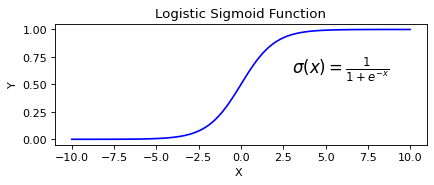

In [68]:
import Introduction_to_deep_learning.utils_plot as uplot
uplot.drow_sigmoid()

#### Tanh Sigmoid:  
hyperbolic tangent that ranges from -1 to 1
## $\tanh(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

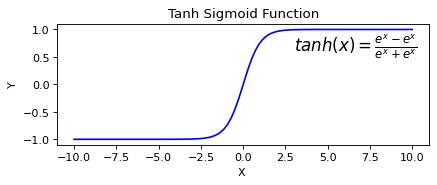

In [69]:
uplot.drow_tanh()

### ReLU (Rectified Linear Unit) Activation Function

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.<br>
## $relu(x)=max(0,x)$

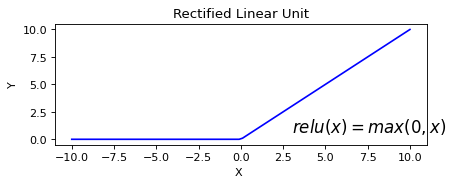

In [70]:
relu = lambda x:  np.maximum(0, x)
uplot.drow_function(func=relu, func_name='Rectified Linear Unit',
                 func_formula = r'$relu(x)=max(0,x)$')

## Handwritten Digit Classification (Minst) 
### Classification example
Based on:
* https://www.coursera.org/learn/neural-networks/lecture/zO1Is/a-simple-example-of-learning-6-min
We will train a simple Linear FFN -Perceptron on Minst data.

#### Load Minst Data

In [71]:
from sklearn.utils import shuffle
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = shuffle(x_train, y_train , random_state=0)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#### Lest View some examples

(28, 28)
Lables are:  [3 6 6 6 0 3 6 2]


<Figure size 432x288 with 0 Axes>

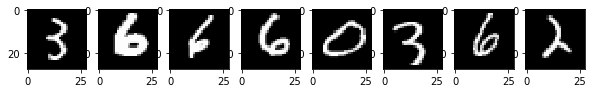

Lables are:  [5 8 2 4 0 1 2 1]


<Figure size 432x288 with 0 Axes>

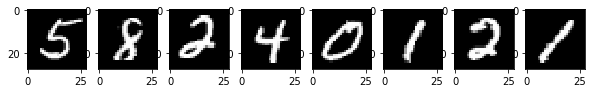

In [72]:
print(x_train[0].shape)
print('Lables are: ', y_train[0:8])
uplot.show_n_images(x_train[0:8])
print('Lables are: ', y_train[80:88])
uplot.show_n_images(x_train[80:88])

### MLP Scheme
* **Weights** will have following shape:  (n_classes, 28*28+1) 
> The one is for the bias, For clarity, we will drow only the first 28*28 weights

* **Predict** - predict the class that has the "larger impact" in W[i]*X
> We canmesaure "larger imapct by sum or mean of the multiplication.

![title](Introduction_to_deep_learning/imgs/d6.png)
#### Update the weights
* **Correct** - If predictionis correct, do nothing
* **Misclasified** - if prediction is wrong:
    * Increas the weights of the correct class by input's active pixels 
    * Decrease the weights of misclassified class by input's active pixels 
<br>
![title](Introduction_to_deep_learning/imgs/d5.png)

In [73]:
def predict(w, x):

    pred_val = np.dot(w, np.append(x, 1))
    pred_class = np.argmax(pred_val)
    return pred_class

In [74]:
def clasify_minst(X, Y,n_classes=10,num=100, epoch=1):
    
       
    np.random.seed(7)

    #w = np.zeros((n_classes,28*28+1))
    w = np.random.random_sample((n_classes,28*28+1))
    
    n_epoch = epoch
    num = num

    for j in range(n_epoch):
        
        acc = 0
        order = np.random.permutation(num)
        
        for i in range(num):

            x, y = X[order[i]], Y[order[i]]
            yhat = predict(w, x)
            
            if y == yhat:
                acc += 1
            else:
                #w_update(x, y, yhat)
                w[y] += np.append(x, 1)
                w[yhat] -= np.append(x, 1)
            
        accuracy = acc / float(num)
        print ('Iteration %d: acc = %f' % (j+1, accuracy))
                
    return w

Iteration 1: acc = 0.000000


<Figure size 432x288 with 0 Axes>

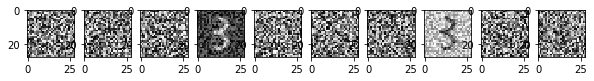

In [75]:
w = clasify_minst(x_train, y_train,num=1,epoch=1)
uplot.show_n_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])

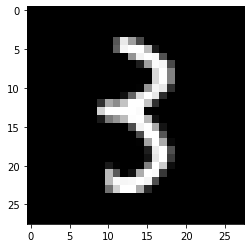

In [76]:
plt.imshow(x_train[0])

Iteration 1: acc = 0.410000


<Figure size 432x288 with 0 Axes>

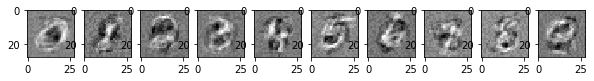

In [77]:
w = clasify_minst(x_train, y_train, num=100, epoch=1)
uplot.show_n_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])

Iteration 1: acc = 0.584000
Iteration 2: acc = 0.792000
Iteration 3: acc = 0.850000
Iteration 4: acc = 0.886000
Iteration 5: acc = 0.908000


<Figure size 432x288 with 0 Axes>

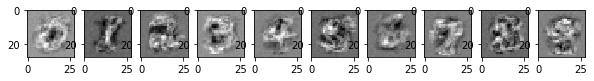

In [78]:
w = clasify_minst(x_train, y_train, num=500, epoch=5)
uplot.show_n_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])

Iteration 1: acc = 0.651250
Iteration 2: acc = 0.816250
Iteration 3: acc = 0.870000
Iteration 4: acc = 0.888750
Iteration 5: acc = 0.915000


<Figure size 432x288 with 0 Axes>

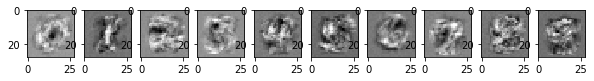

In [79]:
w = clasify_minst(x_train, y_train, num=800, epoch=5)
uplot.show_n_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])

Iteration 1: acc = 0.782667
Iteration 2: acc = 0.850333
Iteration 3: acc = 0.867500
Iteration 4: acc = 0.882000
Iteration 5: acc = 0.892167


<Figure size 432x288 with 0 Axes>

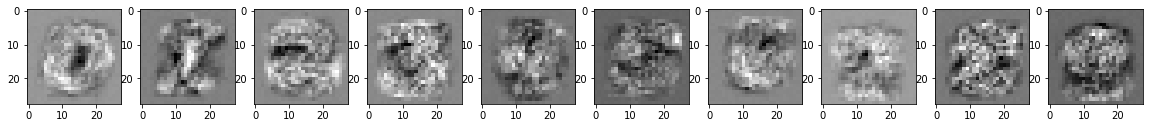

In [80]:
w = clasify_minst(x_train, y_train, num=6000, epoch=5)
uplot.show_n_images([w[i,0:28*28].reshape((28,28)) for i in range(10)], enlarge=20)

In [81]:
def pred_mist(w,inputs):
    pred=[]
    
    for x in inputs:
        
        yhat = predict(w, x)
        pred.append(yhat)
    return pred

### Lets View some predictions

In [82]:
p = pred_mist(w, x_train[22:30])
print('Predictions: ',p)
print('True lables: ', y_train[22:30])

Predictions:  [8, 9, 0, 0, 3, 7, 0, 6]
True lables:  [8 7 0 0 3 7 0 6]


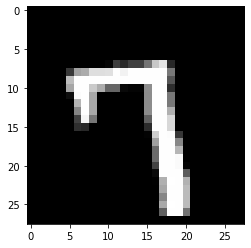

In [83]:
plt.imshow(x_train[23])

#### Evaluate
For simplicity- We will use accuracy score:<br>
![title](Introduction_to_deep_learning/imgs/d7.png)

In [84]:
y_pred = pred_mist(w,x_train)
print('accuracy on train group:', accuracy_score(y_train, y_pred))

accuracy on train group: 0.85945


In [85]:
y_pred_test = pred_mist(w,x_test)
print('accuracy on test group:', accuracy_score(y_test, y_pred_test))
    

accuracy on test group: 0.8605


In [86]:
from keras.utils import np_utils
print(log_loss(np_utils.to_categorical(y_test, 10),
               np_utils.to_categorical(y_pred_test, 10))/10.)

0.4818159307479858


In [87]:
print(np_utils.to_categorical(y_pred_test[0], 10))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
